# Rossmann Store Sales Prediction

Kaggle Competition:
Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

We're accepting Rossmann's challenge to predict 6 weeks of daily sales for 1,115 stores located across Germany. Reliable sales forecasts enable store managers to create effective staff schedules that increase productivity and motivation. By helping Rossmann create a robust prediction model, we will help store managers stay focused on what’s most important to them: their customers and their teams!                                                                                                

![ASW_Corp_Site_Header_Our_Portfolio_Rossmann.jpg](https://user-images.githubusercontent.com/32555702/37235455-ada03b6a-23b3-11e8-9a53-0df7a4b704bc.jpg)

### Project Requirements
- Must use a Regression technique
- Must deploy model you created (not just calling out to Azure, AWS, or Google AI API).
- Must use a real data set (not fake data set, i.e. randomly generated numbers)
- Juypter Notebook Documentation
- Must explain in detail accuracy of model
- Explain the tradeoffs you made
- Do exploratory data exploration

## Table of Contents
1. [Import Packages](#1-bullet) <br>
2. [Data Preparation](#2-bullet) <br>
2.1 [Load Dataset](#2.1-bullet) <br>
2.2 [Dealing With Missing Values](#2.2-bullet) <br>
2.2.1 [Count missing values in each dataset](#2.2.1-bullet) <br>
2.2.2 [Remove features with high percentages of missing values](#2.2.2-bullet) <br>
2.2.3 [Replace missing values in features with low percentages of missing values](#2.2.3-bullet) <br>
2.3 [Date Extraction](#2.3-bullet) <br>
2.4 [Joining Tables](#2.4-bullet) <br>
2.5 [Drop Subsets Of Data Which Might Cause Bias](#2.5-bullet) <br>
2.6 [Feature Engineering](#2.6-bullet) <br>
3. [Exploratory Data Exploration](#3-bullet) <br>
3.1 [Correlation Heatmap](#3.1-bullet) <br>
3.2 [Sales Distribution](#3.2-bullet) <br>
3.3 [Customer Distribution](#3.3-bullet) <br>
3.4 [Sales Over Time](#3.4-bullet) <br>
4. [Sales Prediction](#4-bullet) <br>
4.1 [Linear Regression (OLS)](#4.1-bullet) <br>
4.2 [Bayesian Ridge Regression](#4.2-bullet) <br>
4.3 [LARS Lasso Regression](#4.3-bullet) <br>
4.4 [Decision Tree Regression](#4.4-bullet) <br>
4.5 [Random Forest Regression](#4.5-bullet) <br>
4.6 [K-Nearest Neighbor Regression](#4.6-bullet) <br>


# 1. Import Packages <a class="anchor" id="1-bullet"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
import plotly 
import plotly.graph_objs as go
import plotly.plotly as py
import sklearn
import warnings
warnings.filterwarnings("ignore")

# 2. Data Preparation <a class="anchor" id="2-bullet"></a>

## 2.1 Load Dataset <a class="anchor" id="2.1-bullet"></a>

In [2]:
# Loan Datasets from github repo
url_store = 'https://raw.githubusercontent.com/becliu/MSBA-note/master/ml_class/MLDatasets/Rossmann%20Final%20Dataset/store.csv'
store = pd.read_csv(url_store)

url_train = 'https://raw.githubusercontent.com/becliu/MSBA-note/master/ml_class/MLDatasets/Rossmann%20Final%20Dataset/train.csv'
train = pd.read_csv(url_train,parse_dates = True, index_col = 'Date')


In [3]:
# have a glance on the datasets
print("# of observations & # of features", train.shape)
train.head()

# of observations & # of features (1017209, 8)


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1


In [4]:
print("# of observations & # of features", store.shape)
store.head()

# of observations & # of features (1115, 10)


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


## 2.2 Dealing With Missing Values <a class="anchor" id="2.2-bullet"></a>

### 2.2.1 Count missing values in each dataset <a class="anchor" id="2.2.1-bullet"></a>

In [5]:
print("train:\n\n", train.isnull().sum(),  
     "\n\nstore:\n\n", store.isnull().sum())

train:

 Store            0
DayOfWeek        0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64 

store:

 Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


### 2.2.2 Remove features with high percentages of missing values <a class="anchor" id="2.2.2-bullet"></a>
we can see that some features have a high percentage of missing values and they won't be accurate as indicators, so we will remove features with more than 30% missing values.

In [6]:
# remove features
store = store.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear','Promo2SinceWeek',
                     'Promo2SinceYear', 'PromoInterval'], axis=1)

 ### 2.2.3 Replace missing values in features with low percentages of missing values <a class="anchor" id="2.2.3-bullet"></a>

Text(0.5,1,'Distributin of Store Competition Distance')

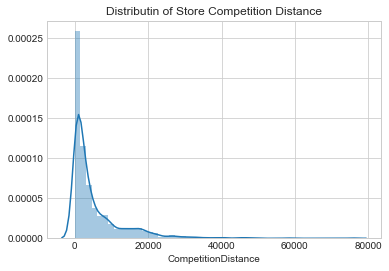

In [7]:
# CompetitionDistance is distance in meters to the nearest competitor store
# let's first have a look at its distribution
sns.distplot(store.CompetitionDistance.dropna())
plt.title("Distributin of Store Competition Distance")

### The distribution is right skewed, so we'll replace missing values with the median.

In [8]:
# replace missing values in CompetitionDistance with median for the store dataset
store.CompetitionDistance.fillna(store.CompetitionDistance.median(), inplace=True)

## 2.3 Date Extraction <a class="anchor" id="2.3-bullet"></a>

In [9]:
# extract year, month, day and week of year from "Date"
train['Year'] = train.index.year
train['Month'] = train.index.month
train['Day'] = train.index.day
train['WeekOfYear'] = train.index.weekofyear
train = train.reset_index()

## 2.4 Joining Tables  <a class="anchor" id="2.4-bullet"></a>

In [10]:
df = pd.merge(train, store, how='left', on='Store')
df.head()

,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,StoreType,Assortment,CompetitionDistance,Promo2
0,2015-07-31,1,5,5263,555,1,1,0,1,2015,7,31,31,c,a,1270.0,0
1,2015-07-31,2,5,6064,625,1,1,0,1,2015,7,31,31,a,a,570.0,1
2,2015-07-31,3,5,8314,821,1,1,0,1,2015,7,31,31,a,a,14130.0,1
3,2015-07-31,4,5,13995,1498,1,1,0,1,2015,7,31,31,c,c,620.0,0
4,2015-07-31,5,5,4822,559,1,1,0,1,2015,7,31,31,a,a,29910.0,0


In [11]:
len(df)

1017209

## 2.5 Drop Subsets Of Data Where Might Cause Bias <a class="anchor" id="2.5-bullet"></a>

In [12]:
# where stores are closed, they won't generate sales, so we will remove this part of the dataset
df = df[df.Open != 0]

In [13]:
# Open isn't a variable anymore, so we'll drop it
df = df.drop('Open', axis=1)

In [14]:
# see if there's any opened store with zero sales
df[df.Sales == 0]['Store'].sum()

31460

In [15]:
# see the percentage of open stored with zero sales
df[df.Sales == 0]['Sales'].sum()/df.Sales.sum()

0.0

In [16]:
# remove this part of data to avoid bias
df = df[df.Sales != 0]

## 2.6 Feature Engineering <a class="anchor" id="2.6-bullet"></a>

In [17]:
# see what variable types we have
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 1017190
Data columns (total 16 columns):
Date                   844338 non-null datetime64[ns]
Store                  844338 non-null int64
DayOfWeek              844338 non-null int64
Sales                  844338 non-null int64
Customers              844338 non-null int64
Promo                  844338 non-null int64
StateHoliday           844338 non-null object
SchoolHoliday          844338 non-null int64
Year                   844338 non-null int64
Month                  844338 non-null int64
Day                    844338 non-null int64
WeekOfYear             844338 non-null int64
StoreType              844338 non-null object
Assortment             844338 non-null object
CompetitionDistance    844338 non-null float64
Promo2                 844338 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(11), object(3)
memory usage: 109.5+ MB


In [18]:
# see what's in nominal varibles 
set(df.StateHoliday), set(df.StoreType), set(df.Assortment)

({0, '0', 'a', 'b', 'c'}, {'a', 'b', 'c', 'd'}, {'a', 'b', 'c'})

In [19]:
# StateHoliday indicates a state holiday - a = public holiday, b = Easter holiday, c = Christmas, 0 = None
# convert number 0 to string 0
df.loc[df.StateHoliday == 0,'StateHoliday'] = df.loc[df.StateHoliday == 0,'StateHoliday'].astype(str)

In [20]:
# make a copy in case I mess up anything 
df1 = df.copy()

### 2.6.1 Create new variable "AvgSales" <a class="anchor" id="2.6.1-bullet"></a>
create a variable that calculates monthly average sales for each store

In [21]:
# calculate weekly average sales
sales = df1[['Year','Month','Store','Sales']].groupby(['Year','Month','Store']).mean()
sales = sales.rename(columns={'Sales':'AvgSales'})
sales = sales.reset_index()

In [22]:
df1['sales_key']=df1['Year'].map(str) + df1['Month'].map(str) + df1['Store'].map(str)
sales['sales_key']=sales['Year'].map(str) + sales['Month'].map(str) + sales['Store'].map(str)

In [23]:
# drop extra columns
sales = sales.drop(['Year','Month','Store'], axis=1)
# merge
df1 = pd.merge(df1, sales, how='left', on=('sales_key'))

### 2.6.2 Create new variable "AvgCustomer"  <a class="anchor" id="2.6.2-bullet"></a>
create a variable that calculates Monthly average number of customers for each store, becuase daily number of customer is another variable to be predicted

In [24]:
# calculate weekly average
cust = df1[['Year','Month','Store','Customers']].groupby(['Year','Month', 'Store']).mean()
cust = cust.rename(columns={'Customers':'AvgCustomer'})
cust = cust.reset_index()

In [25]:
df1['cust_key']=df1['Year'].map(str) + df1['Month'].map(str) + df1['Store'].map(str)
cust['cust_key']=cust['Year'].map(str) + cust['Month'].map(str) + cust['Store'].map(str)

In [26]:
# drop original feature Customers
df1 = df1.drop('Customers', axis=1)# drop extra columns
cust = cust.drop(['Year', 'Month', 'Store'], axis=1)

In [27]:
# merge
df1 = pd.merge(df1, cust, how="left", on=('cust_key'))

### 2.6.3 Transform Variable "StateHoliday"

In [28]:
# 0 - not a state holiday; 1- is on a state holiday
df1['StateHoliday'] = df1.StateHoliday.map({'0':0, 'a':1 ,'b' : 1,'c': 1})

In [29]:
# drop extra columns
df1 = df1.drop(['cust_key','sales_key','Store','Date'], axis=1)

# 3. Exploratory Data Analysis

In [30]:
# becasue my computer keeps crashing, I had to sample the dataset 
dfv = df.sample(n=5000, random_state=1)

In [31]:
# set up credential file for plotly
plotly.tools.set_credentials_file(username='mei_zmyang', api_key='Z8Jn8zb2xXh4lfckv9xa')

## 3.1 Correlation Heatmap
create a heatmap to see correlation between all variables

In [32]:
corr = df1.corr()

Text(0.5,1,'Correlation Heatmap')

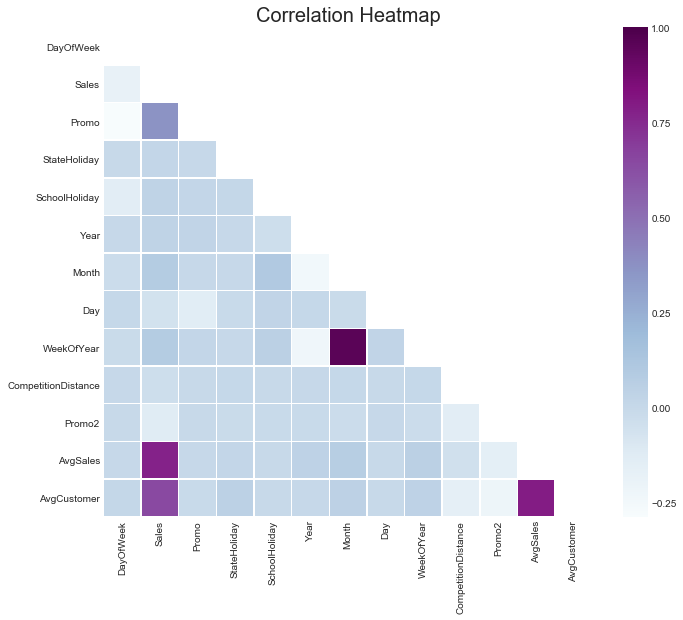

In [33]:
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize = (11, 9))
sns.heatmap(corr, mask = mask,
            square = True, linewidths = .5, ax = ax, cmap = "BuPu")
plt.title("Correlation Heatmap", fontsize=20)

## 3.2 Sales Distribution

In [35]:
sales_dist = [go.Histogram(x=dfv.Sales, marker=dict(color='pink'))]
layout2 = go.Layout(title='Sales Distribution', xaxis=dict(title='daily sales in $'), yaxis=dict(title='number of observations'))
fig2 = go.Figure(data=sales_dist, layout=layout2)
# py.iplot(fig2)

## 3.3 Customer Distribution

In [36]:
cust_dist = [go.Histogram(x=dfv.Customers, marker=dict(color=('rgb(158,202,225')))]
layout3 = go.Layout(title='Customer Distribution', 
                   xaxis=dict(title='daily total number of customers'), yaxis=dict(title='number of observations'))
fig3 = go.Figure(data=cust_dist, layout=layout3)
# py.iplot(fig3)

## 3.4 Sales Over Time

In [37]:
store1_2015 = df.query('Store == 1 and Year == 2015')
store1_2013 = df.query('Store == 1 and Year == 2013')
store1_2014 = df.query('Store == 1 and Year == 2014')

In [38]:
trace_2013 = go.Scatter(
                x=store1_2013.Date,
                y=store1_2013.Sales,
                name = "2013",
                opacity = 0.8)

trace_2014 = go.Scatter(
                x=store1_2014.Date,
                y=store1_2014.Sales,
                name = "2014",
                opacity = 0.8)

trace_2015 = go.Scatter(
                x=store1_2015.Date,
                y=store1_2015.Sales,
                name = "2015",
                opacity = 0.8)

data = [trace_2013,trace_2014, trace_2015]
layout = go.Layout(title='Sales Over Time', 
                   xaxis=dict(title='Date'), yaxis=dict(title='Sales'))
fig = go.Figure(data=data, layout=layout)
# py.iplot(fig)

## 3.5 Sales Over Days Of A Month

In [39]:
day_s = [go.Scatter(x=dfv.Day, y=dfv.Sales, mode='markers', 
                    marker=dict(size=15, color=dfv.Customers, colorbar=dict(title='Number Of Customers'),))]
layout5 = go.Layout(title='Sales Over Days Of A Month', 
                   xaxis=dict(title='Day Of Month'), yaxis=dict(title='Total Sales'))
fig5 = go.Figure(data=day_s, layout=layout5)
# py.iplot(fig5)

## 3.6 Sales Over Weeks

In [40]:
trace = go.Bar(x=dfv.WeekOfYear,
                y=dfv.Sales,
                name = "WeekOfYear", marker=dict(color=dfv.WeekOfYear, colorscale='Jet'))

data = [trace]
layout = go.Layout(title='Sales Over Week Of Year', 
                   xaxis=dict(title='Week Of Year'), yaxis=dict(title='Sales'))
fig = go.Figure(data=data, layout=layout)
# py.iplot(fig)

In [41]:
day_w = [go.Bar(x=dfv.DayOfWeek, y=dfv.Sales, 
                marker=dict(color=dfv.DayOfWeek,
                            colorscale ='Viridis'))]
layout6 = go.Layout(title='Sales Over Days Of A Week', 
                   xaxis=dict(title='Day Of Week'), yaxis=dict(title='Total Sales'))
fig6 = go.Figure(data=day_w, layout=layout6)
# py.iplot(fig6)

## 3.7 Sales By Store Type

In [42]:
# StoreType - differentiates between 4 different store models: a, b, c, d
s_type = [go.Box(x=dfv.StoreType, y=dfv.Sales,
                 boxpoints='all', jitter=0.3, pointpos=-1.8)]
layout7 = go.Layout(title='Sales By Store Type', 
                   xaxis=dict(title='Store Type'), yaxis=dict(title='Total Sales'))
fig7 = go.Figure(data=s_type, layout=layout7)
# py.iplot(fig7)

## 3.8 Sales By Assortment

In [43]:
# Assortment - describes an assortment level: a = basic, b = extra, c = extended
s_assort = [go.Box(x=dfv.Assortment, y=dfv.Sales,marker=dict(color='green'), 
                 boxpoints='all', jitter=0.3, pointpos=-1.8)]
layout8 = go.Layout(title='Sales By Assortment', 
                   xaxis=dict(title='Assortment'), yaxis=dict(title='Total Sales'))
fig8 = go.Figure(data=s_assort, layout=layout8)
# py.iplot(fig8)

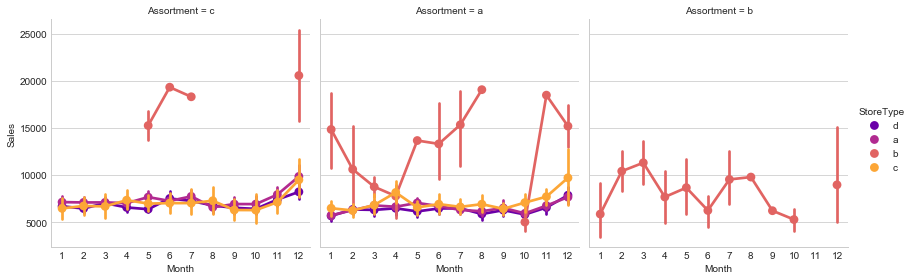

In [44]:
sns.factorplot(data = dfv, x = 'Month', y = "Sales", 
               col = 'Assortment',
               palette = 'plasma',
               hue = 'StoreType')

## 3.9 Sales vs. Number Of Customers

In [45]:
cust_s = [go.Scatter(x=dfv.Customers, y=dfv.Sales, mode='markers', 
                     marker=dict(size=20,color=dfv.CompetitionDistance,
                                 colorbar=dict(title='Competition Distance'),colorscale='Earth'))]
layout9 = go.Layout(title='Sales vs. Number Of Customers', 
                   xaxis=dict(title='Number Of Customers'), yaxis=dict(title='Sales'))
fig9 = go.Figure(data=cust_s, layout=layout9)
# py.iplot(fig9)

## 3.10 Sales vs. Competition Distance

In [46]:
distance_s = [go.Scatter(x=dfv.CompetitionDistance, y=dfv.Sales, mode='markers', 
                     marker=dict(size=20,color=dfv.Customers,
                                 colorbar=dict(title='Number Of Customers'),colorscale='Jet'))]
layout10 = go.Layout(title='Sales vs. Competition Distance', 
                   xaxis=dict(title='Competition Distance'), yaxis=dict(title='Sales'))
fig10 = go.Figure(data=distance_s, layout=layout10)
# py.iplot(fig10)

## 3.11 Sales By Promotion

In [47]:
s_promo = [go.Box(x=dfv.Promo, y=dfv.Sales,marker=dict(color='purple'), 
                 boxpoints='all', jitter=0.3, pointpos=-1.8)]
layout11 = go.Layout(title='Sales By Promotion', 
                   xaxis=dict(title='Promotion(0-No Promotion; 1-Promotion Period)'), yaxis=dict(title='Total Sales'))
fig11 = go.Figure(data=s_promo, layout=layout11)
# py.iplot(fig11)

In [48]:
promo0 = dfv.query('Promo==0')
promo0 = promo0.rename(columns={'Sales':'No_Promotion_Sales'})
promo1 = dfv.query('Promo==1')
promo1 = promo1.rename(columns={'Sales':'Promotion_Sales'})
x1 = promo0.No_Promotion_Sales
x2 = promo1.Promotion_Sales

Text(0,0.5,'Sales')

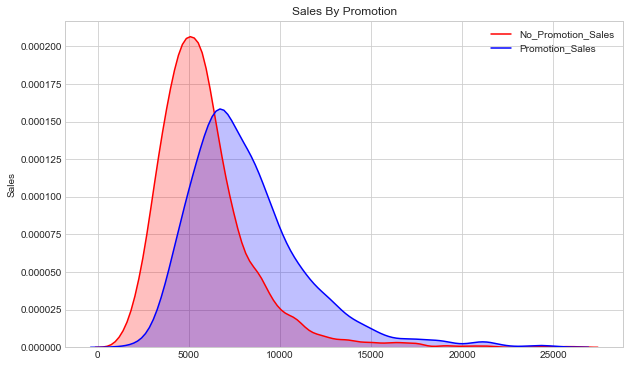

In [49]:
plt.figure(figsize=(10,6))
ax = sns.kdeplot(x1, shade=True, color="r")
ax = sns.kdeplot(x2, shade=True, color="b")
plt.title("Sales By Promotion")
plt.ylabel('Sales')

## 3.12 Pair Plot

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

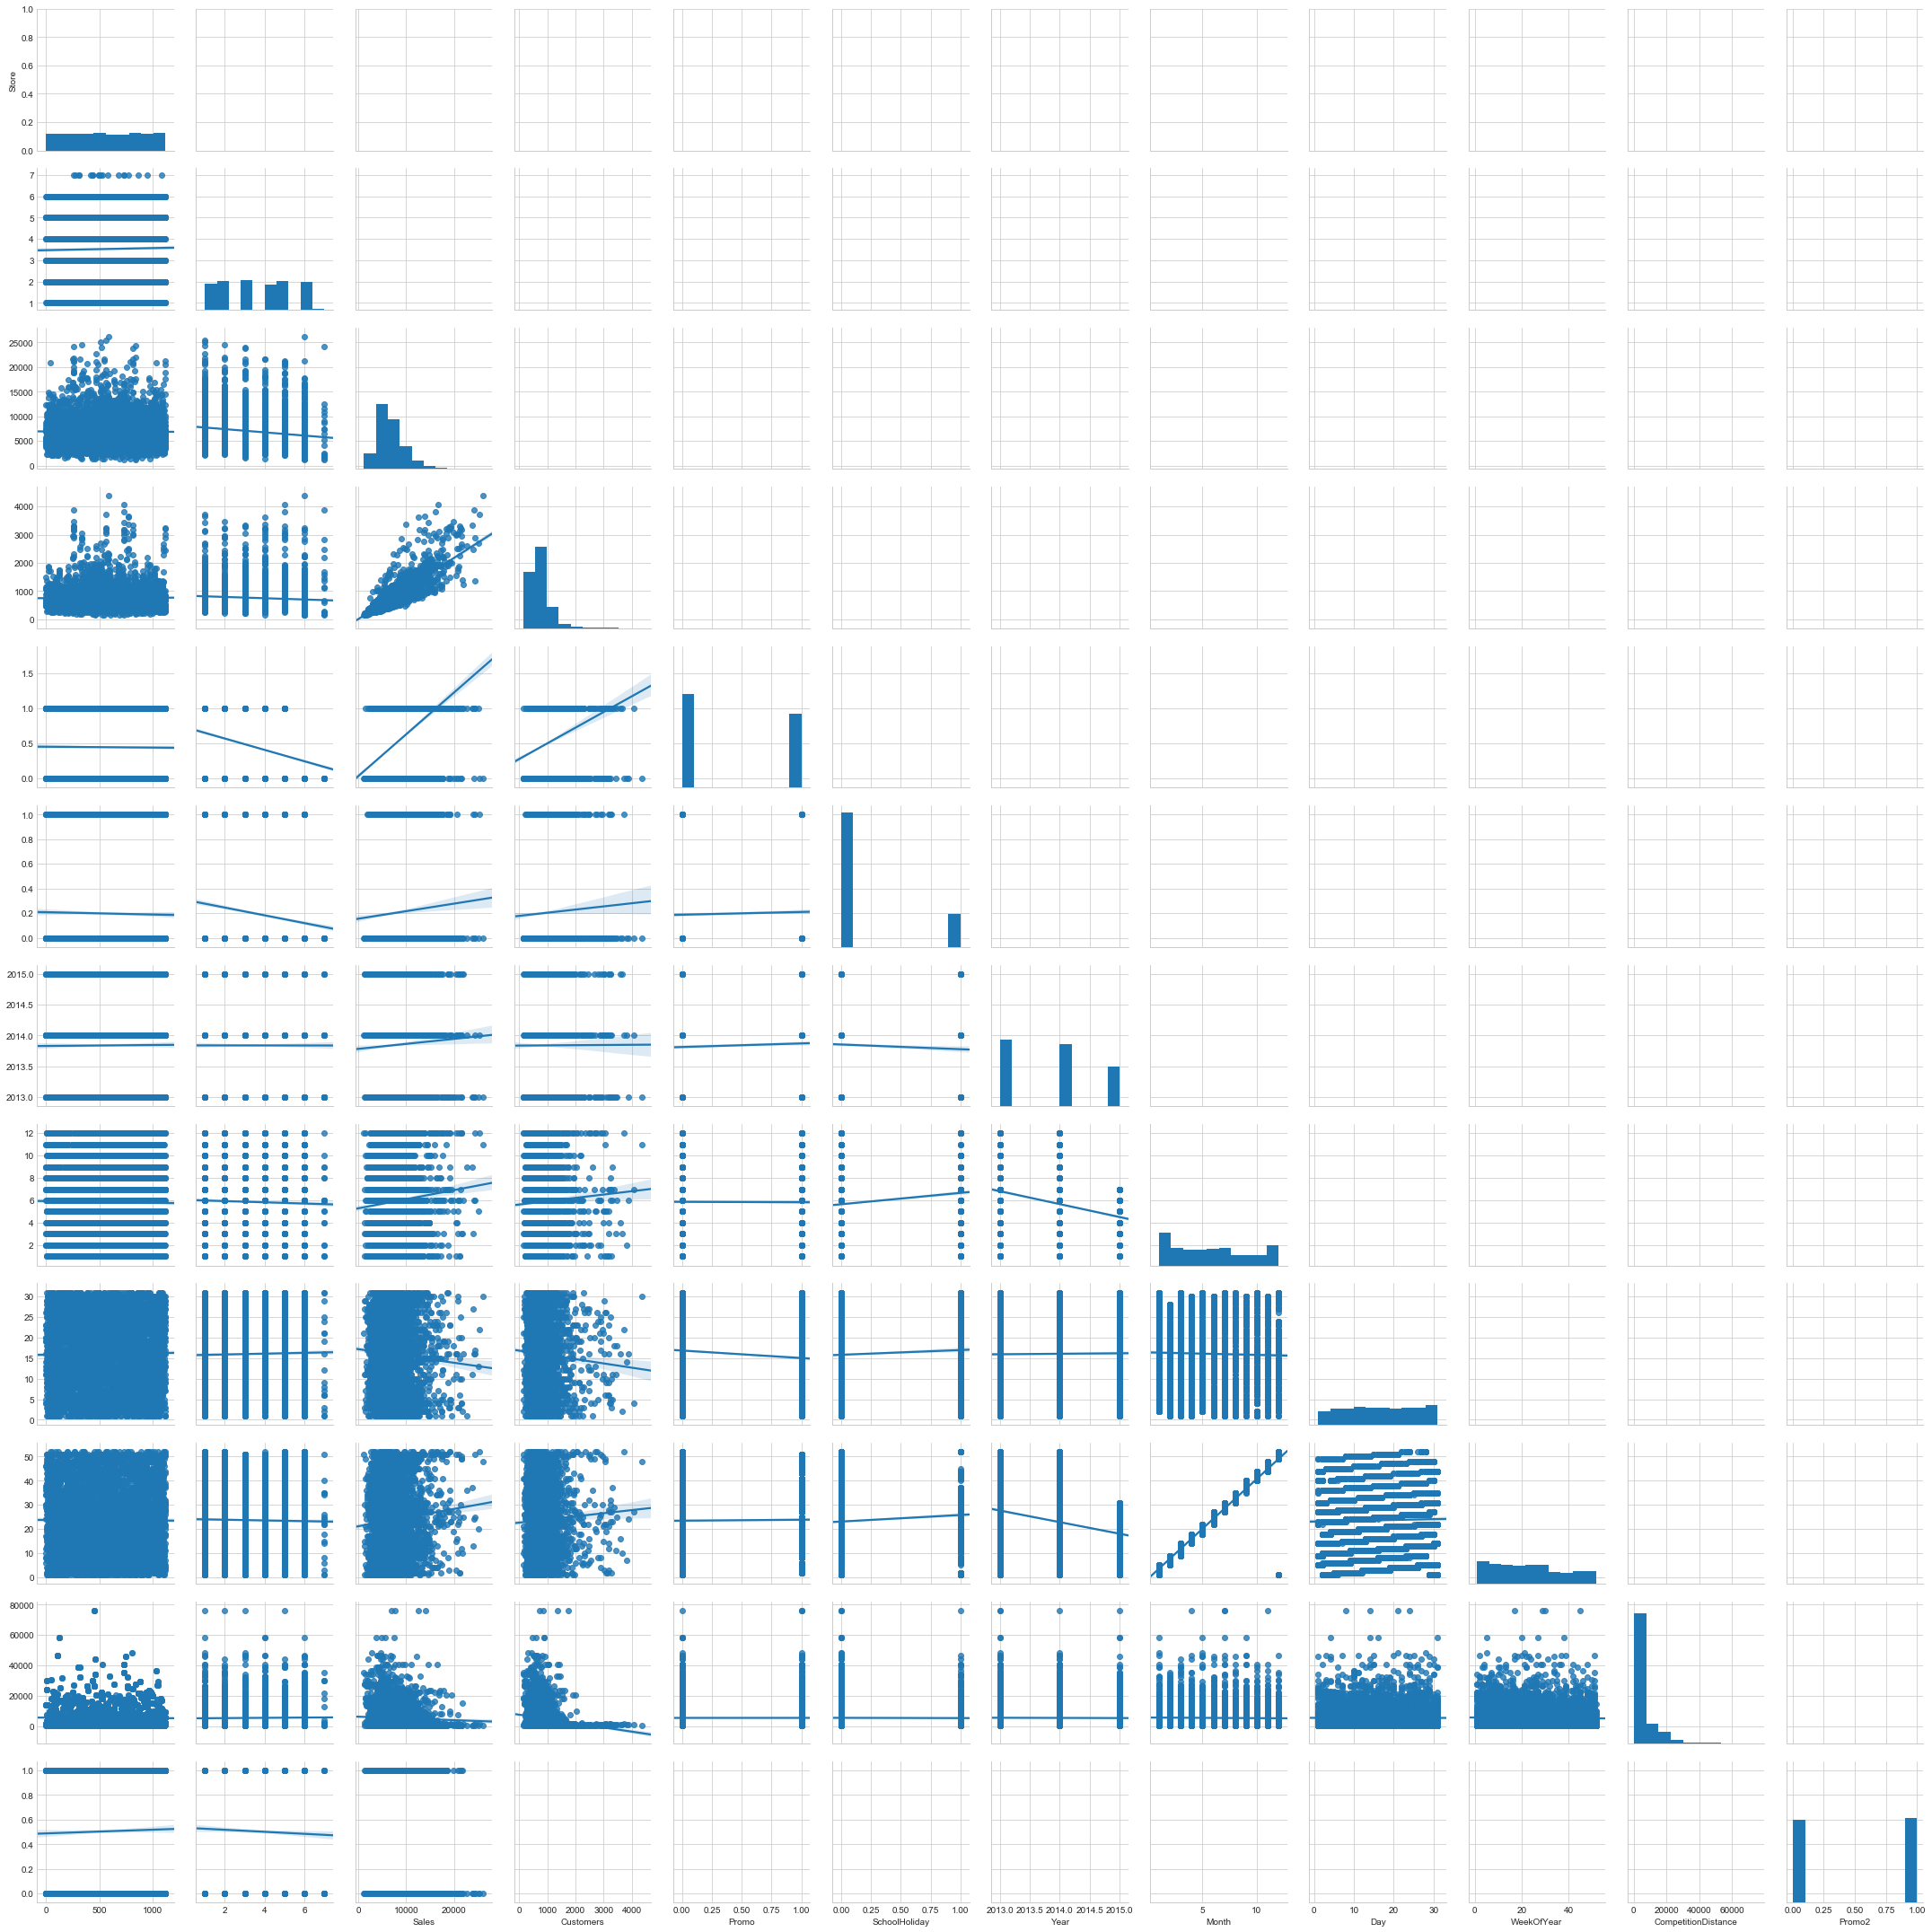

In [50]:
plt.figure()
sns.pairplot(dfv, kind='reg')
plt.title('Pair Plot', fontsize=20)

# 4. Store Sales Prediction

In [51]:
df1.head()

,DayOfWeek,Sales,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,StoreType,Assortment,CompetitionDistance,Promo2,AvgSales,AvgCustomer
0,5,5263,1,0,1,2015,7,31,31,c,a,1270.0,0,4491.333333,519.407407
1,5,6064,1,0,1,2015,7,31,31,a,a,570.0,1,4954.259259,621.222222
2,5,8314,1,0,1,2015,7,31,31,a,a,14130.0,1,6797.592593,682.888889
3,5,13995,1,0,1,2015,7,31,31,c,c,620.0,0,10256.851852,1294.259259
4,5,4822,1,0,1,2015,7,31,31,a,a,29910.0,0,4599.629630,521.703704


In [53]:
# since I ran into memorry error and wasn't able to solve it (even on AWS Sagemaker), 
# I had to use to sample dataset with 50000 observations to build ML models.
dfd = df1.sample(n=50000, random_state=1)

In [63]:
# split features and labels
X = dfd.drop('Sales', axis=1)
y = dfd.Sales
y

79585      8581
342406     7983
546552    12259
606893     3650
666534     8518
551508     5392
530010     4484
100265     5819
621142     5333
786882     5227
388216     7011
304389     8141
888708     7613
90434      4694
745202     5104
860080     5354
735159     6433
586490     6730
48509      3887
344194     5757
900798     9993
895592     5902
504566     7966
173046    15988
793668     8152
194070     4079
99587      5741
311715     4406
847032     6332
159637     6989
          ...  
52008      6871
287451     4041
65309     11638
340498     5122
627975     8091
41726      3944
352390     5521
501773     7273
614316    10584
20526      5564
823626     3813
25452      4718
804509    11364
291824     8321
666779     8335
727095     3799
588465     4734
831003     6612
778925    13154
357931     3631
599430     7340
785372     5739
7592       4725
626748     7684
882036     5177
8285       9175
784655     6693
884237     2693
815299     4659
169000     7642
Name: Sales, Length: 500

In [62]:
# get dummy variables for categorical features for linear regression
xd = X.copy()
xd.head()
# xd = pd.get_dummies(xd)


,DayOfWeek,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,StoreType,Assortment,CompetitionDistance,Promo2,AvgSales,AvgCustomer
79585,4,1,0,0,2015,5,7,19,a,a,1100.0,0,8249.782609,874.434783
342406,2,1,0,0,2014,7,15,29,a,a,4740.0,1,6148.740741,503.037037
546552,3,1,0,0,2013,12,18,51,a,c,3270.0,0,9175.541667,860.692308
606893,3,0,0,1,2013,10,30,44,a,a,150.0,1,4151.807692,521.153846
666534,2,1,0,0,2013,8,27,35,d,c,6360.0,1,7267.148148,591.407407


In [58]:
# label nominal variables for tree based regression
xl = X.copy()

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
xl.StateHoliday = label.fit_transform(xl.StateHoliday)
xl.Assortment = label.fit_transform(xl.Assortment)
xl.StoreType = label.fit_transform(xl.StoreType)

In [59]:
# split training and test datasets
from sklearn.cross_validation import train_test_split
xd_train,xd_test,yd_train,yd_test = train_test_split(xd,y,test_size=0.3, random_state=1)
xl_train,xl_test,yl_train,yl_test = train_test_split(xl,y,test_size=0.3, random_state=1)

xd_train.head()

,DayOfWeek,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,CompetitionDistance,Promo2,AvgSales,AvgCustomer,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
668920,6,0,0,0,2013,8,24,34,1310.0,1,6341.592593,567.444444,1,0,0,0,1,0,0
37690,2,0,0,0,2015,6,23,26,560.0,1,7451.560000,756.000000,1,0,0,0,1,0,0
437004,6,0,0,0,2014,3,29,13,9230.0,1,6749.807692,556.961538,0,0,0,1,0,0,1
690799,4,1,0,1,2013,8,1,31,29910.0,0,4665.518519,539.444444,1,0,0,0,1,0,0
580662,4,1,0,0,2013,11,21,47,19700.0,1,6507.269231,545.807692,0,0,0,1,1,0,0


## 4.1 Linear Regression (OLS)

In [ ]:
from sklearn.linear_model import LinearRegression
lin= LinearRegression()
linreg = lin.fit(xd_train, yd_train)

In [ ]:
# definte RMSE function
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(x, y):
    return sqrt(mean_squared_error(x, y))

# definte MAPE function
def mape(x, y): 
    return np.mean(np.abs((x - y) / x)) * 100  
  
# get cross validation scores 
yd_predicted = linreg.predict(xd_train)
yd_test_predicted = linreg.predict(xd_test)

print("Regresion Model Score" , ":" , linreg.score(xd_train, yd_train) , "," ,
      "Out of Sample Test Score" ,":" , linreg.score(xd_test, yd_test))
print("Training RMSE", ":", rmse(yd_train, yd_predicted),
      "Testing RMSE", ":", rmse(yd_test, yd_test_predicted))
print("Training MAPE", ":", mape(yd_train, yd_predicted),
      "Testing MAPE", ":", mape(yd_test, yd_test_predicted))

## 4.2 Bayesian Ridge Regression

In [ ]:
from sklearn.linear_model import BayesianRidge
rdg = BayesianRidge()
rdgreg = rdg.fit(xd_train, yd_train)

In [ ]:
# validation
print("Regresion Model Score" , ":" , rdgreg.score(xd_train, yd_train) , "," ,
      "Out of Sample Test Score" ,":" , rdgreg.score(xd_test, yd_test))

yd_predicted = rdgreg.predict(xd_train)
yd_test_predicted = rdgreg.predict(xd_test)

print("Training RMSE", ":", rmse(yd_train, yd_predicted),
      "Testing RMSE", ":", rmse(yd_test, yd_test_predicted))
print("Training MAPE", ":", mape(yd_train, yd_predicted),
      "Testing MAPE", ":", mape(yd_test, yd_test_predicted))

## 4.3 LARS Lasso Regression

In [ ]:
from sklearn.linear_model import LassoLars
las = LassoLars(alpha=0.3, fit_intercept=False, normalize=True)
lasreg = las.fit(xd_train, yd_train)


In [ ]:
print("Regresion Model Score" , ":" , lasreg.score(xd_train, yd_train) , "," ,
      "Out of Sample Test Score" ,":" , lasreg.score(xd_test, yd_test))

yd_predicted = lasreg.predict(xd_train)
yd_test_predicted = lasreg.predict(xd_test)

print("Training RMSE", ":", rmse(yd_train, yd_predicted),
      "Testing RMSE", ":", rmse(yd_test, yd_test_predicted))
print("Training MAPE", ":", mape(yd_train, yd_predicted),
      "Testing MAPE", ":", mape(yd_test, yd_test_predicted))

## 4.4 Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(min_samples_leaf=20)
treereg = tree.fit(xl_train, yl_train)

In [ ]:
print("Regresion Model Score" , ":" , treereg.score(xl_train, yl_train) , "," ,
      "Out of Sample Test Score" ,":" , treereg.score(xl_test, yl_test))

yl_predicted = treereg.predict(xl_train)
yl_test_predicted = treereg.predict(xl_test)
print("Training RMSE", ":", rmse(yl_train, yl_predicted),
      "Testing RMSE", ":", rmse(yl_test, yl_test_predicted))
print("Training MAPE", ":", mape(yl_train, yl_predicted),
      "Testing MAPE", ":", mape(yl_test, yl_test_predicted))

## 4.5 Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rdf = RandomForestRegressor(n_estimators=30)
rdfreg = rdf.fit(xl_train, yl_train)

In [ ]:
print("Regresion Model Score" , ":" , rdfreg.score(xl_train, yl_train) , "," ,
      "Out of Sample Test Score" ,":" , rdfreg.score(xl_test, yl_test))   

yl_predicted = rdfreg.predict(xl_train)
yl_test_predicted = rdfreg.predict(xl_test)

print("Training RMSE", ":", rmse(yl_train, yl_predicted),
      "Testing RMSE", ":", rmse(yl_test, yl_test_predicted))
print("Training MAPE", ":", mape(yl_train, yl_predicted),
      "Testing MAPE", ":", mape(yl_test, yl_test_predicted))

## 4.6 K-Nearest Neighbors Regression

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 30)
knnreg = knn.fit(xd_train, yd_train)

In [ ]:
print("Regresion Model Score" , ":" , knnreg.score(xd_train, yd_train) , "," ,
      "Out of Sample Test Score" ,":" , knnreg.score(xd_test, yd_test))

yd_predicted = knnreg.predict(xd_train)
yd_test_predicted = knnreg.predict(xd_test)

print("Training RMSE", ":", rmse(yd_train, yd_predicted),
      "Testing RMSE", ":", rmse(yd_test, yd_test_predicted))
print("Training MAPE", ":", mape(yd_train, yd_predicted),
      "Testing MAPE", ":", mape(yd_test, yd_test_predicted))

In [ ]:
for x in range(1,30):
    knn = KNeighborsRegressor(n_neighbors = x)
    knnreg = knn.fit(xd_train, yd_train)
    print("Regresion Model Score" , ":" , knnreg.score(xd_train, yd_train) , "," ,
      "Out of Sample Test Score" ,":" , knnreg.score(xd_test, yd_test))

## 4.7 Model Selection
Let's put the evaluation metrics together, and see which model performed better!

![rossmann-score](https://user-images.githubusercontent.com/32555702/37251007-8ad4710e-24bd-11e8-8ac2-682904ceb50c.JPG)

## Feature Importance

In [ ]:
features = xl_train.columns
importances = rdfreg.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(8,10))
plt.title('Feature Importances', fontsize=20)
plt.barh(range(len(indices)), importances[indices], color='pink', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

State Holiday: a = public holiday, b = Easter holiday, c = Christmas, 0 = None

![cavs6skwqaapxpg](https://user-images.githubusercontent.com/32555702/37251006-8ab7650a-24bd-11e8-819f-c802f4385414.png)